[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


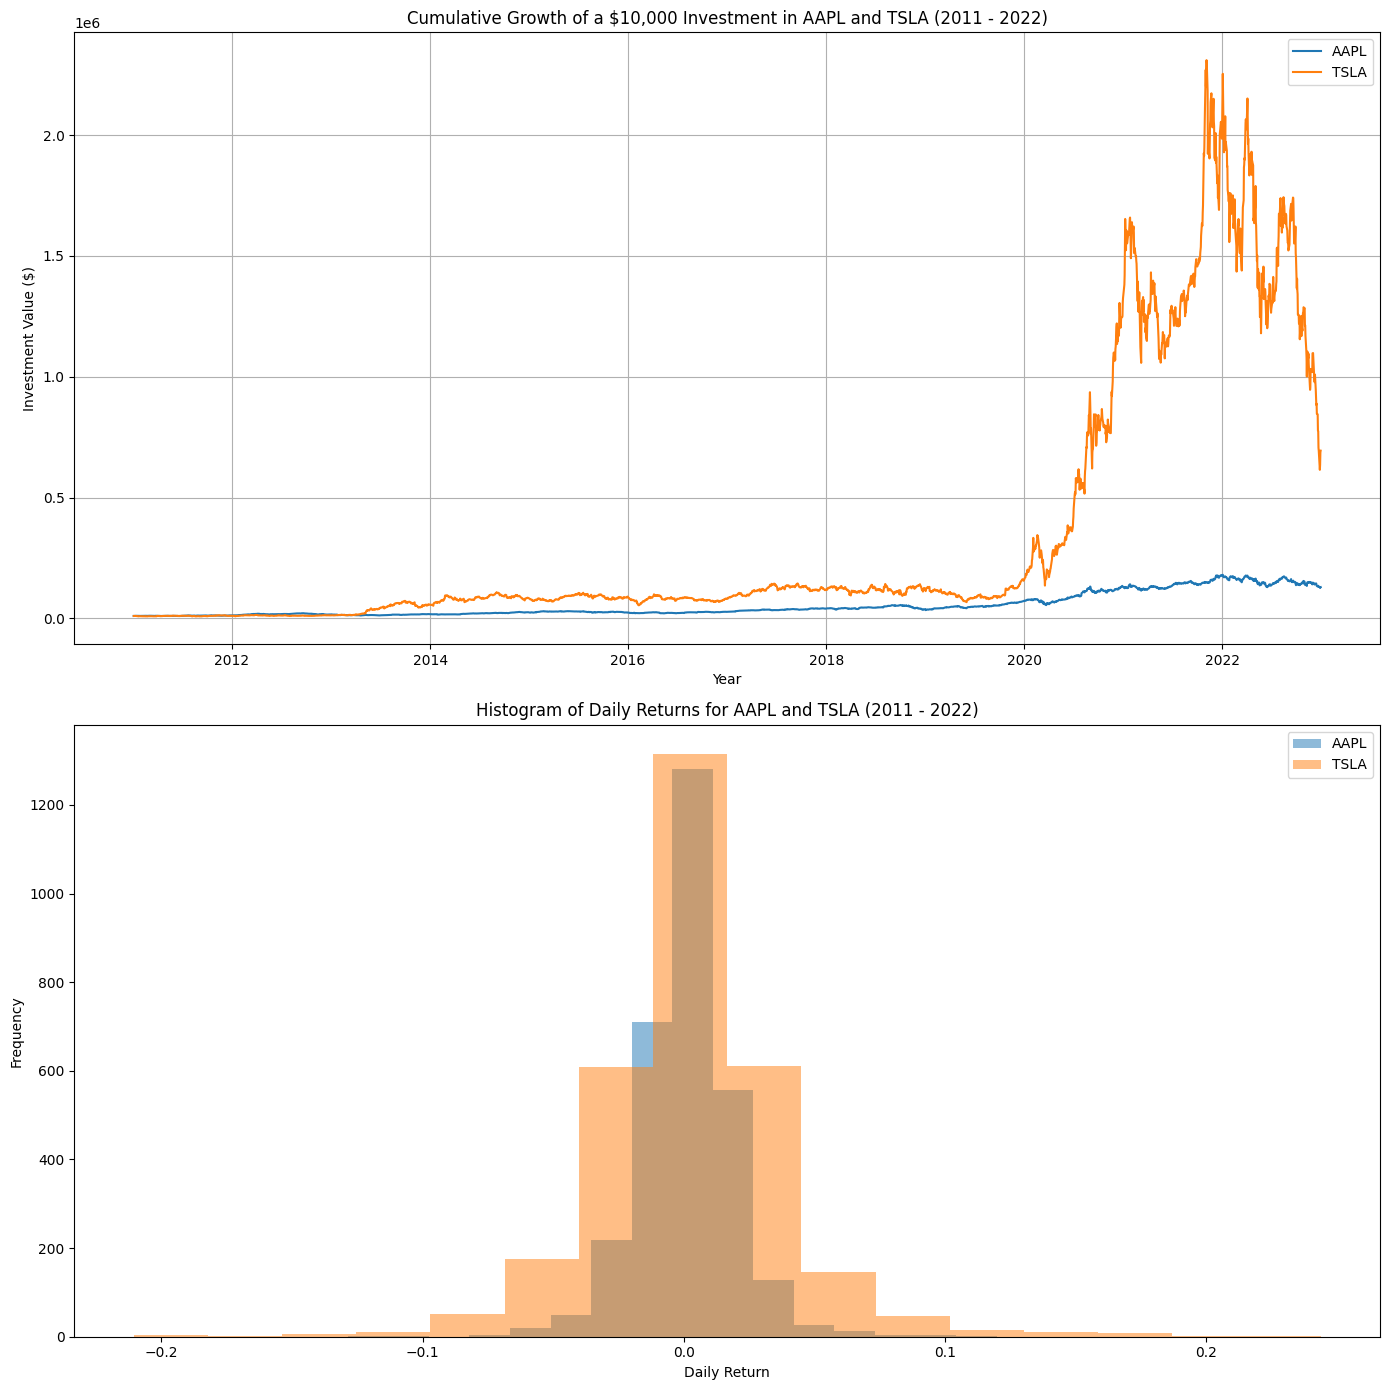

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

aapl = yf.download('AAPL', start='2011-01-01', end='2022-12-31')
tsla = yf.download('TSLA', start='2011-01-01', end='2022-12-31')

# Calculate daily returns
aapl['Daily Return'] = aapl['Adj Close'].pct_change()
tsla['Daily Return'] = tsla['Adj Close'].pct_change()

aapl['Cumulative Return'] = 10000 * (1 + aapl['Daily Return']).cumprod()
tsla['Cumulative Return'] = 10000 * (1 + tsla['Daily Return']).cumprod()

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].plot(aapl.index, aapl['Cumulative Return'], label='AAPL')
ax[0].plot(tsla.index, tsla['Cumulative Return'], label='TSLA')
ax[0].set_title('Cumulative Growth of a $10,000 Investment in AAPL and TSLA (2011 - 2022)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Investment Value ($)')
ax[0].legend()
ax[0].grid(True)

ax[1].hist(aapl['Daily Return'].dropna(), bins=16, alpha=0.5, label='AAPL')
ax[1].hist(tsla['Daily Return'].dropna(), bins=16, alpha=0.5, label='TSLA')
ax[1].set_title('Histogram of Daily Returns for AAPL and TSLA (2011 - 2022)')
ax[1].set_xlabel('Daily Return')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()
